In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
#ignoring convergence warnings for grid searches
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

In [3]:
train = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv',parse_dates=['DateAS','DateOS'])
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv', parse_dates=['DateAS','DateOS'])

In [4]:
# function definitions
def sep_num_cat(df):
    numeric_cols = df.select_dtypes(include=[int, float])
    cat_cols=df.drop(numeric_cols.columns, axis=1)
    return numeric_cols,cat_cols
def dtype_ratio(df):
    plt.pie(df.dtypes.value_counts(),labels=df.dtypes.value_counts().keys(),autopct='%.0f%%')
    plt.show()

# Exploratory Data Analysis

In [5]:
train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [6]:
train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000,99976,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,2018-08-12 12:10:39.130199808,2018-04-15 12:40:18.916540160,0.505250
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016-06-13 17:28:00,2015-07-15 00:00:00,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2018-08-04 00:38:00,2018-04-10 00:00:00,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2018-08-20 05:38:00,2018-07-10 00:00:00,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2018-09-06 08:09:00,2018-08-14 00:00:00,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,2018-09-25 23:56:00,2018-10-02 00:00:00,1.000000
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,NaN,NaN,0.499975


In [7]:
train.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   IsBetaUser                          100000 non-null  int64         
 1   RealTimeProtectionState             99934 non-null   float64       
 2   IsPassiveModeEnabled                100000 non-null  int64         
 3   AntivirusConfigID                   99924 non-null   float64       
 4   NumAntivirusProductsInstalled       99924 non-null   float64       
 5   NumAntivirusProductsEnabled         99924 non-null   float64       
 6   HasTpm                              100000 non-null  int64         
 7   CountryID                           100000 non-null  int64         
 8   CityID                              99377 non-null   float64       
 9   GeoRegionID                         100000 non-null  float64       
 10  LocaleEng

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   MachineID                           10000 non-null  object        
 1   ProductName                         10000 non-null  object        
 2   EngineVersion                       10000 non-null  object        
 3   AppVersion                          10000 non-null  object        
 4   SignatureVersion                    10000 non-null  object        
 5   IsBetaUser                          10000 non-null  int64         
 6   RealTimeProtectionState             9991 non-null   float64       
 7   IsPassiveModeEnabled                10000 non-null  int64         
 8   AntivirusConfigID                   9998 non-null   float64       
 9   NumAntivirusProductsInstalled       9998 non-null   float64       
 10  NumAntivirusProductsEna

In [9]:
#separate
num_train, cat_train= sep_num_cat(train)
num_test, cat_test= sep_num_cat(test)

#grouping For numerical columns
num_cols= [col for col in num_train.columns if col not in ['target']]
#seperate the columns which are to be treated like cat_cols
cat_like_columns = []
# Iterate through non-object columns
for column in num_cols:
    # Check if the column has low cardinality
    if train[column].nunique() >20:
        cat_like_columns.append(column)
    # Check if the column name suggests it's categorical (e.g., contains "ID", "Flag", "Code")
    elif any(keyword in column.lower() for keyword in ['id', 'flag', 'code', 'state', 'mode']):
        cat_like_columns.append(column)

# Print the identified categorical like columns
print("Columns to treat as categorical:")
print(cat_like_columns, len(cat_like_columns))

num_cols = [col for col in num_cols if col not in cat_like_columns]
# Check skewness
skew_values = train[num_cols].skew().sort_values(ascending=False)
#print("Skewness of numerical columns:\n", skew_values)

# Identify highly skewed features (threshold = |1|)
highly_skewed_cols = skew_values[abs(skew_values) > 1].index.tolist()
print("\nHighly skewed columns (consider log transformation):", highly_skewed_cols)



Columns to treat as categorical:
['RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'SMode', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'FirmwareManufacturerID', 'FirmwareVersionID', 'RegionIdentifier'] 28

Highly skewed columns (consider log transformation): ['EnableLUA', 'IsPortableOS', 'IsVirtualDevice', 'NumAntivirusProductsEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'ProcessorCoreCount', 'HasOpticalDiskDrive', 'IsTouchEnabled', 'NumAntivirusProductsInstalled', 'IsSystemProtected', 'FirewallEnabled', 'HasTpm']


In [10]:
#Grouping for cat columns
# Categorize categorical columns based on cardinality

cat_cols=cat_train.columns
cat_cols= [col for col in train.columns if col in cat_like_columns or col in cat_cols]
binary_cols = [col for col in cat_cols if train[col].nunique() == 2]
low_card_cols = [col for col in cat_cols if 2 < train[col].nunique() <= 10]
medium_card_cols = [col for col in cat_cols if 10 < train[col].nunique() <= 100]
high_card_cols = [col for col in cat_cols if train[col].nunique() > 100]

print(f"Binary Columns: {binary_cols}")
print(f"Low-Cardinality Columns (One-Hot): {low_card_cols}")
print(f"Medium-Cardinality Columns (Label Encoding): {medium_card_cols}")
print(f"High-Cardinality Columns (Target/Frequency Encoding): {high_card_cols}")

Binary Columns: ['ProductName', 'IsPassiveModeEnabled', 'SMode', 'DeviceFamily']
Low-Cardinality Columns (One-Hot): ['RealTimeProtectionState', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'ProcessorManufacturerID', 'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing']
Medium-Cardinality Columns (Label Encoding): ['EngineVersion', 'AppVersion', 'OSBuildNumber', 'MDC2FormFactor', 'ChassisType', 'OSBranch', 'OSBuildNumberOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallLanguageID', 'OSUILocaleID', 'RegionIdentifier']
High-Cardinality Columns (Target/Frequency Encoding): ['MachineID', 'SignatureVersion', 'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildLab', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDispl

We checked the continuity and dependence in numerical columns and the cardinality of categorical columns to apply better encoding techniques. 

## Visualisations

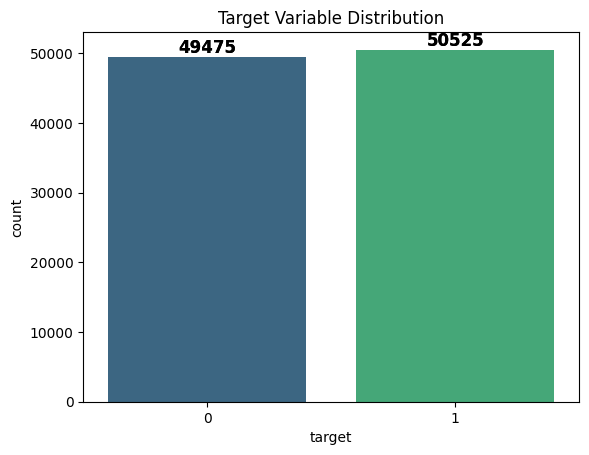

In [11]:
sns.countplot(x=train['target'])
ax = sns.countplot(x=train['target'], palette="viridis")
# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.title("Target Variable Distribution")
plt.show()

Checking if target values are balanced. Yes they are.

In [12]:
train['DateAS'] = train['DateAS'].astype(int)
train['DateOS'] = train['DateOS'].astype(int)
test['DateOS'] = test['DateOS'].astype(int)
test['DateAS'] = test['DateAS'].astype(int)

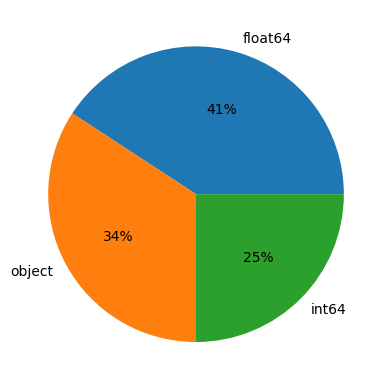

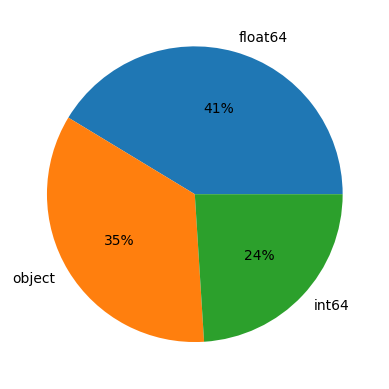

In [13]:
dtype_ratio(train)
dtype_ratio(test)

Train Null Values MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS                0
target                0
Length: 76, dtype: int64
Test Null Values MachineID                            0
ProductName                          0
EngineVersion                        0
AppVersion                           0
SignatureVersion                     0
                                    ..
IsAlwaysOnAlwaysConnectedCapable    12
IsGamer                             62
RegionIdentifier                    62
DateAS                               0
DateOS                               0
Length: 75, dtype: int64


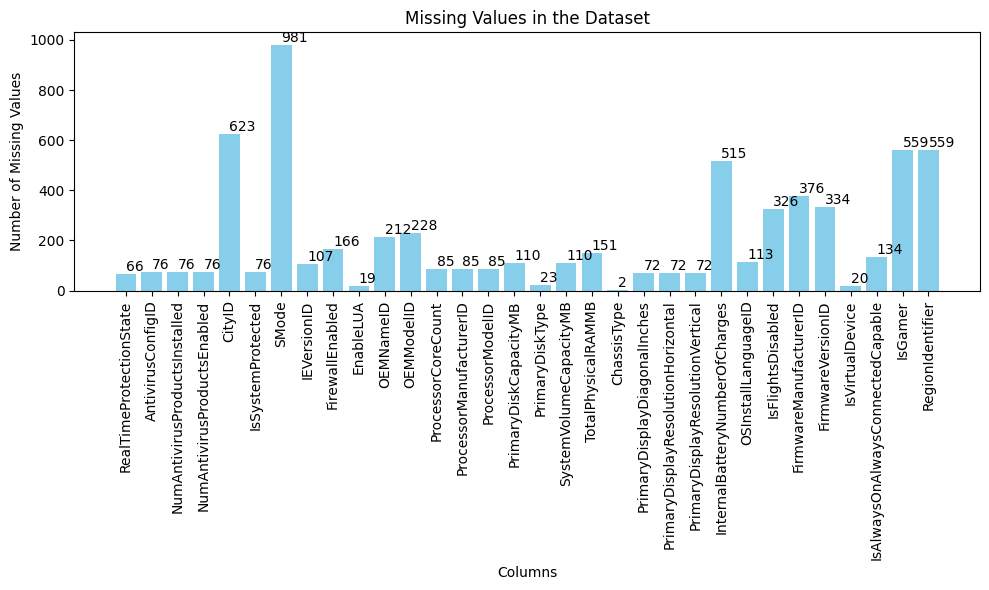

In [14]:
print('Train Null Values',train.isnull().sum())
print('Test Null Values',test.isnull().sum())

# Assuming 'train' is your DataFrame
missing_values = train.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

# Adding the count of missing values at the end of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title("Missing Values in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No column has unknows >1000 and most are < around 200 so filling na as unknown would be good enough as total data is 10,000 rows.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


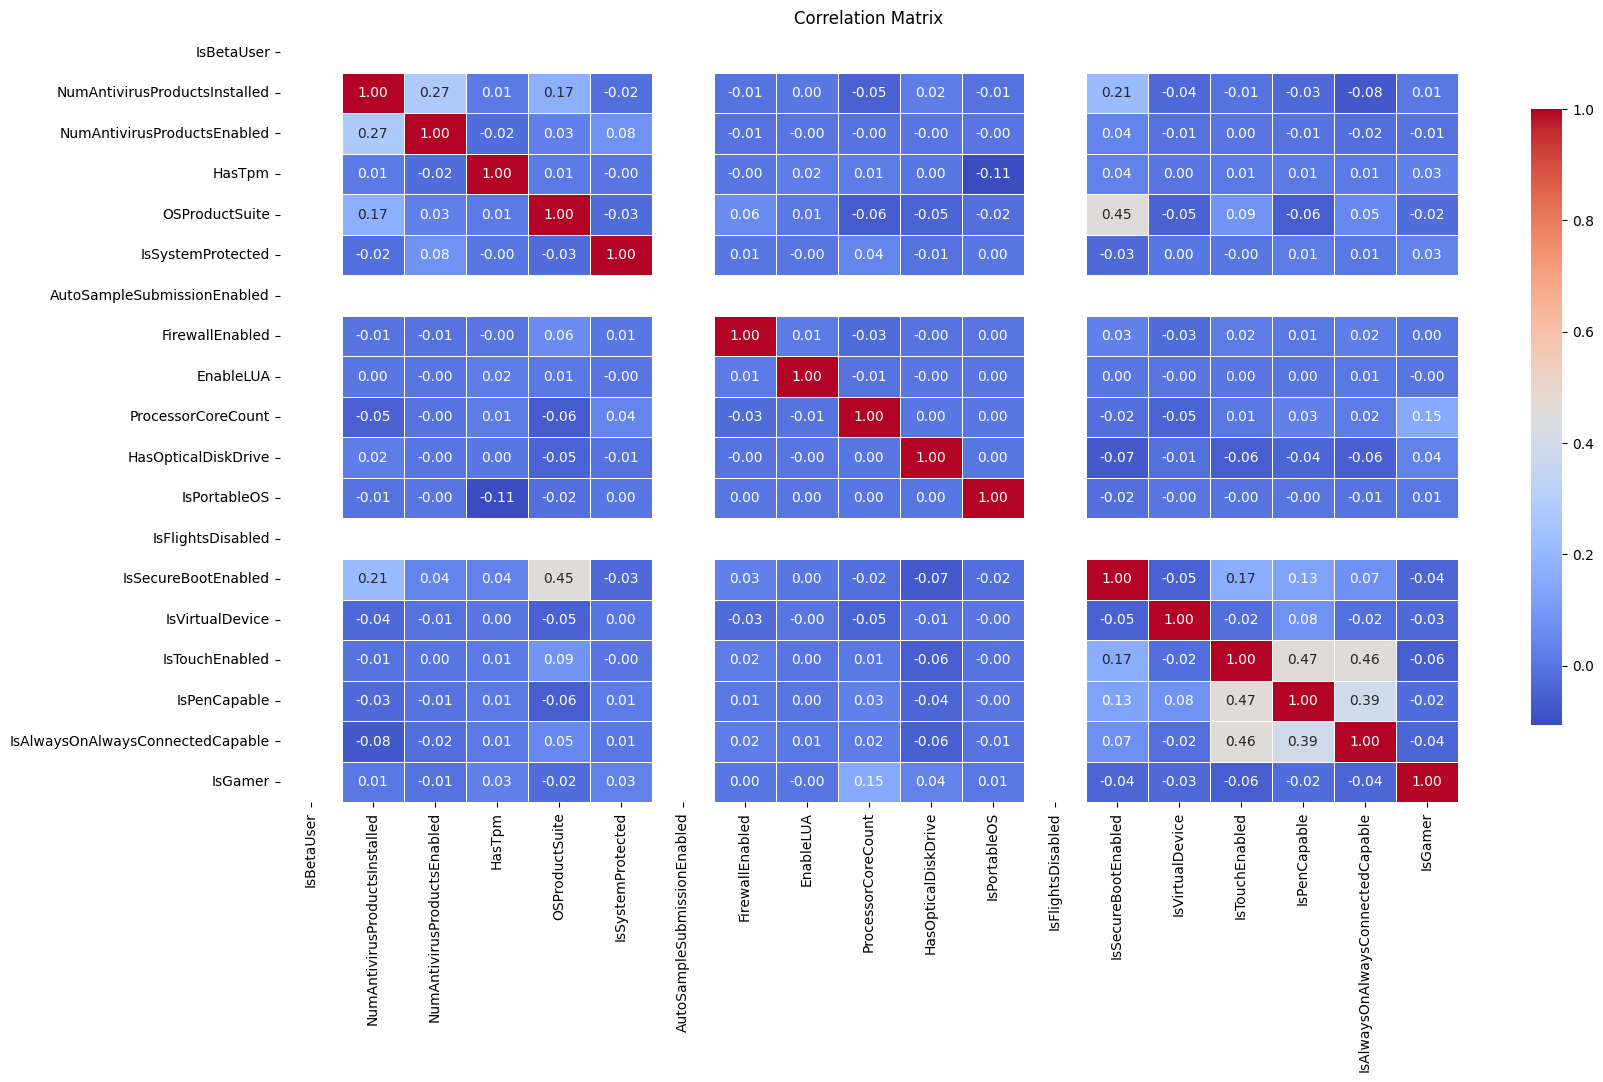

In [15]:
# Calculate correlation matrix
corr_matrix = train[num_cols].corr()
#Mask the upper triangle of the heatmap (since it's symmetric)
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Plot the heatmap
plt.figure(figsize=(19, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.8}, linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

there are some correlations, we will use PCA after encoding categorical columns,

In [16]:
train[num_cols].describe()

,IsBetaUser,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,FirewallEnabled,EnableLUA,ProcessorCoreCount,HasOpticalDiskDrive,IsPortableOS,IsFlightsDisabled,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer
count,100000.0,99924.000000,99924.000000,100000.000000,100000.000000,99924.000000,100000.0,99834.000000,99981.000000,99915.000000,100000.00000,100000.000000,99674.0,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000
mean,0.0,1.326528,1.018264,0.996780,578.403380,0.955326,0.0,0.980067,0.996569,4.011500,0.08140,0.000520,0.0,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668
std,0.0,0.520681,0.155291,0.056654,247.240971,0.206588,0.0,0.139771,0.266669,2.033075,0.27345,0.022798,0.0,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791
min,0.0,1.000000,0.000000,0.000000,16.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,1.000000,1.000000,256.000000,1.000000,0.0,1.000000,1.000000,2.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,1.000000,768.000000,1.000000,0.0,1.000000,1.000000,4.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,2.000000,1.000000,1.000000,768.000000,1.000000,0.0,1.000000,1.000000,4.000000,0.00000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,5.000000,4.000000,1.000000,784.000000,1.000000,0.0,1.000000,48.000000,64.000000,1.00000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preprocessiong

In [17]:
y=train['target']
train = train.drop("target", axis=1)

In [18]:
#fillna
for col in cat_cols:
    train[col] = train[col].fillna('Unknown')

for col in cat_cols:
    test[col] = test[col].fillna('Unknown')

for col in num_cols:
    train[col] = train[col].fillna(train[col].mean())

for col in num_cols:
    test[col] = test[col].fillna(test[col].mean())
    

In [19]:
# verify for NaN values
print(f"Count of NaN values in 'train_csv': {train.isna().sum().sum()} values")
print(f"Count of NaN values in 'test_csv': {test.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 0 values
Count of NaN values in 'test_csv': 0 values


In [20]:
# Check for infinite values
print(np.isinf(num_train).sum().sum())

0


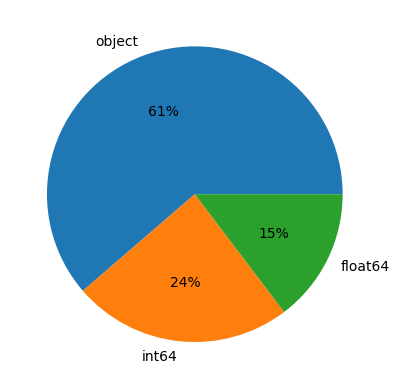

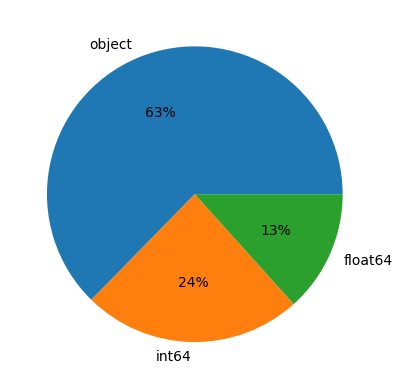

In [21]:
dtype_ratio(train)
dtype_ratio(test)

In [22]:
for col in binary_cols:
    print(train[col].unique())

['win8defender' 'mse']
[0 1]
[0.0 'Unknown' 1.0]
['Windows.Desktop' 'Windows.Server']


In [23]:
#encoding cat and cat_like columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encoding Binary Columns
for col in binary_cols:
    # Define the mapping dictionary
    binary_map = {'win8defender': 1, 'mse': 0, 'Windows.Desktop': 1, 'Windows.Server': 0, 0.0: 0, 1.0: 1, 0: 0, 1:1}

    # Apply the mapping and set anything else to -1
    train[col] = train[col].map(binary_map).fillna(-1).astype(int)
    test[col] = test[col].map(binary_map).fillna(-1).astype(int)

In [24]:
'''# Encoding Low-Cardinality Columns (One-Hot Encoding)
train = pd.get_dummies(train, columns=low_card_cols, drop_first=True)
# Use the same dummy columns as in the train dataset
test = pd.get_dummies(test, columns=low_card_cols, drop_first=True)
# Ensure the test dataset has the same columns as the train dataset after one-hot encoding
# Add missing columns (if any) and fill them with 0
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

# Reorder columns to match the train dataset
test = test[train.columns]'''

'# Encoding Low-Cardinality Columns (One-Hot Encoding)\ntrain = pd.get_dummies(train, columns=low_card_cols, drop_first=True)\n# Use the same dummy columns as in the train dataset\ntest = pd.get_dummies(test, columns=low_card_cols, drop_first=True)\n# Ensure the test dataset has the same columns as the train dataset after one-hot encoding\n# Add missing columns (if any) and fill them with 0\nmissing_cols = set(train.columns) - set(test.columns)\nfor col in missing_cols:\n    test[col] = 0\n\n# Reorder columns to match the train dataset\ntest = test[train.columns]'

In [25]:
# Encoding Medium-Cardinality Columns (Label Encoding)
label_encoders = {}
for col in low_card_cols:
    labelE = LabelEncoder()
    train[col] = labelE.fit_transform(train[col].astype(str))
    
    # handle unseen labels in test data
    test[col]= test[col].map(lambda s: '<unknown>' if s not in labelE.classes_ else s)
    labelE.classes_ = np.append(labelE.classes_, '<unknown>')
    test[col] = labelE.transform(test[col].astype(str))
    
    # store the label encoder
    label_encoders[col] = labelE
for col in medium_card_cols:
    labelE = LabelEncoder()
    train[col] = labelE.fit_transform(train[col].astype(str))
    
    # handle unseen labels in test data
    test[col]= test[col].map(lambda s: '<unknown>' if s not in labelE.classes_ else s)
    labelE.classes_ = np.append(labelE.classes_, '<unknown>')
    test[col] = labelE.transform(test[col].astype(str))
    
    # store the label encoder
    label_encoders[col] = labelE

In [26]:
# Encoding High-Cardinality Columns (Label Encoding cont)
for col in high_card_cols:
    labelE = LabelEncoder()
    train[col] = labelE.fit_transform(train[col].astype(str))
    
    # handle unseen labels in test data
    test[col]= test[col].map(lambda s: '<unknown>' if s not in labelE.classes_ else s)
    labelE.classes_ = np.append(labelE.classes_, '<unknown>')
    test[col] = labelE.transform(test[col].astype(str))
    
    # store the label encoder
    label_encoders[col] = labelE

In [27]:
print(label_encoders.keys())

dict_keys(['RealTimeProtectionState', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'SKUEditionName', 'ProcessorManufacturerID', 'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'EngineVersion', 'AppVersion', 'OSBuildNumber', 'MDC2FormFactor', 'ChassisType', 'OSBranch', 'OSBuildNumberOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallLanguageID', 'OSUILocaleID', 'RegionIdentifier', 'MachineID', 'SignatureVersion', 'AntivirusConfigID', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildLab', 'IEVersionID', 'OEMNameID', 'OEMModelID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSBuildRevisionOnly', 'FirmwareManufacturerID', 'FirmwareVe

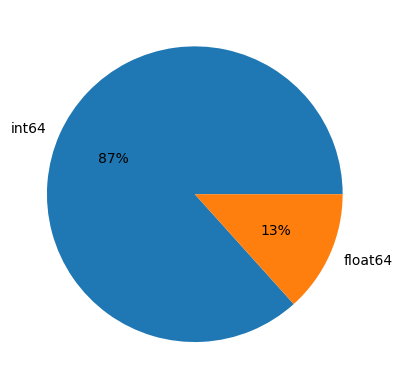

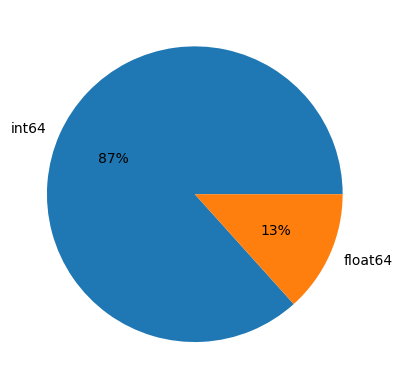

In [28]:
dtype_ratio(train)
dtype_ratio(test)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  int64  
 1   ProductName                         10000 non-null  int64  
 2   EngineVersion                       10000 non-null  int64  
 3   AppVersion                          10000 non-null  int64  
 4   SignatureVersion                    10000 non-null  int64  
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             10000 non-null  int64  
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   10000 non-null  int64  
 9   NumAntivirusProductsInstalled       10000 non-null  float64
 10  NumAntivirusProductsEnabled         10000 non-null  float64
 11  HasTpm                              10000 

In [30]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#standardscaler
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)

X = train_scaled

pca = PCA(n_components=50)  # Reduce to n features
X_train_pca = pca.fit_transform(X)
test_pca = pca.transform(test_scaled)


## Model

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X.info()
#y.info()
#print(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 75 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  float64
 1   ProductName                         100000 non-null  float64
 2   EngineVersion                       100000 non-null  float64
 3   AppVersion                          100000 non-null  float64
 4   SignatureVersion                    100000 non-null  float64
 5   IsBetaUser                          100000 non-null  float64
 6   RealTimeProtectionState             100000 non-null  float64
 7   IsPassiveModeEnabled                100000 non-null  float64
 8   AntivirusConfigID                   100000 non-null  float64
 9   NumAntivirusProductsInstalled       100000 non-null  float64
 10  NumAntivirusProductsEnabled         100000 non-null  float64
 11  HasTpm                     

In [32]:
from sklearn.dummy import DummyClassifier
#dummy
model = DummyClassifier().fit(X,y)

from sklearn.linear_model import LogisticRegression
#Initialize Logistic Regression
model_lr = LogisticRegression(max_iter=2000)

import lightgbm as lgb
# Define the model
model_lgb = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', n_jobs=-1)
# Define LightGBM model
model_lgb_fast = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', learning_rate=0.05, n_estimators=1000)

from sklearn.linear_model import SGDClassifier
# Initialize SGD Classifier
model_sgd = SGDClassifier(random_state=42)

from sklearn.neighbors import KNeighborsClassifier
# Initialize Knn Classifier
model_knn = KNeighborsClassifier()

import xgboost as xgb
# Define XGBoost model
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # Change this for multiclass/regression
    learning_rate=0.05,
    n_estimators=1000,  # High number, but early stopping will stop early
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False  # Avoid warning for older versions
)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV

#logistic regression
param_grid_lr = {
    'C': [0.1, 1, 50],  # Regularization strength
    'penalty': ['l1', 'l2'],        # Regularization type
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Include 'lbfgs' which is robust
    'max_iter': [200, 500]          # Increased max_iter values
}
#dummy classifier 
param_grid_dum = {
    'strategy': ['stratified', 'most_frequent', 'uniform', 'constant'],
    'constant': [0, 1]  # Only relevant if strategy is 'constant'
}
#lgb classifier
param_grid_lgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200, 500]
}
#sgd classifier
param_grid_sgd = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],  # Different loss functions
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': [0.001, 0.01, 0.1, 1],  # Initial learning rate (for 'constant' or 'invscaling')
    'max_iter': [1000, 2000, 3000],  # Number of epochs
    'tol': [1e-3, 1e-4, 1e-5],  # Convergence tolerance
}
#knn classifier
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2],  # Minkowski power parameter (p=1: Manhattan, p=2: Euclidean)
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Search algorithm
}


 #batch processing
'''# Initialize classifier
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, max_iter=1, warm_start=True)

# Batch training
batch_size = 10000  # Adjust based on memory capacity
n_batches = len(X_train) // batch_size

for i in range(n_batches):
    X_batch = X_train[i * batch_size : (i + 1) * batch_size]
    y_batch = y_train[i * batch_size : (i + 1) * batch_size]
    sgd.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

print("SGD Model Accuracy:", sgd.score(X_val, y_val))'''

# Set up HalvingGridSearchCV
#halving_gs = HalvingGridSearchCV(model_knn, param_grid_knn, cv=3, factor=5, resource='n_samples', n_jobs=-1, verbose=1)

# Set up GridSearchCV
#grid_search = GridSearchCV(estimator=model_sgd,scoring='accuracy', param_grid=param_grid_sgd, cv=5, verbose=1, n_jobs=-1)

# Set up RandomizedSearchCV(
#random_search = RandomizedSearchCV(model_lgb, param_grid_lgb, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
#random_search.fit(X_train_pca, y)
#model_sgd.fit(X_train, y_train)
#halving_gs.fit(X_train_pca, y)

# Get the best hyperparameters
#best_params = halving_gs.best_params_
#best_estimator = halving_gs.best_estimator_
#best_params = random_search.best_params_
#best_estimator = random_search.best_estimator_
#best_params = grid_search.best_params_
#best_estimator = grid_search.best_estimator_

# Output the best parameters and estimator
#print("Best Parameters:", best_params)
#print("Best Estimator:", best_estimator)

#model_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50,  eval_metric='auc', verbose=50)
#Train with early stopping (stops if AUC doesn't improve for 50 rounds)
model_lgb_fast.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='auc', callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)])

[LightGBM] [Info] Number of positive: 35445, number of negative: 34555
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4919
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506357 -> initscore=0.025430
[LightGBM] [Info] Start training from score 0.025430
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.66946	valid_0's binary_logloss: 0.650344
[100]	valid_0's auc: 0.676914	valid_0's binary_logloss: 0.644776
[150]	valid_0's auc: 0.678314	valid_0's binary_logloss: 0.643602
[200]	valid_0's auc: 0.678481	valid_0's binary_logloss: 0.643278
Early stopping, best iteration is:
[168]	valid_0's auc: 0.678719	valid_0's binary_logloss: 0.643287


LGBMClassifier(learning_rate=0.05, n_estimators=1000, objective='binary')

In [34]:
#y_pred_val=best_estimator.predict(X_val)
#y_pred=best_estimator.predict(test_pca)
#Predictions
y_pred_val = np.round(model_lgb_fast.predict_proba(X_val)[:,1])
y_pred = np.round(model_lgb_fast.predict_proba(test_scaled)[:,1])
#print(y_pred)
#y_pred_val = model_xgb.predict(X_val)
#y_pred = model_xgb.predict(test_scaled)
accuracy = accuracy_score(y_val, y_pred_val)
print(accuracy)
#y_pred = le_tar.inverse_transform(np.round(y_pred).astype(int))
#y_pred = best_estimator.predict(X_test)

0.6280666666666667


In [35]:
submission = pd.DataFrame(columns = ["id","target"]) 
submission["id"] = [i for i in range(len(y_pred))]
submission["target"] = y_pred
submission.to_csv('submission.csv',index=False)